In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F
import warnings
warnings.filterwarnings("ignore")

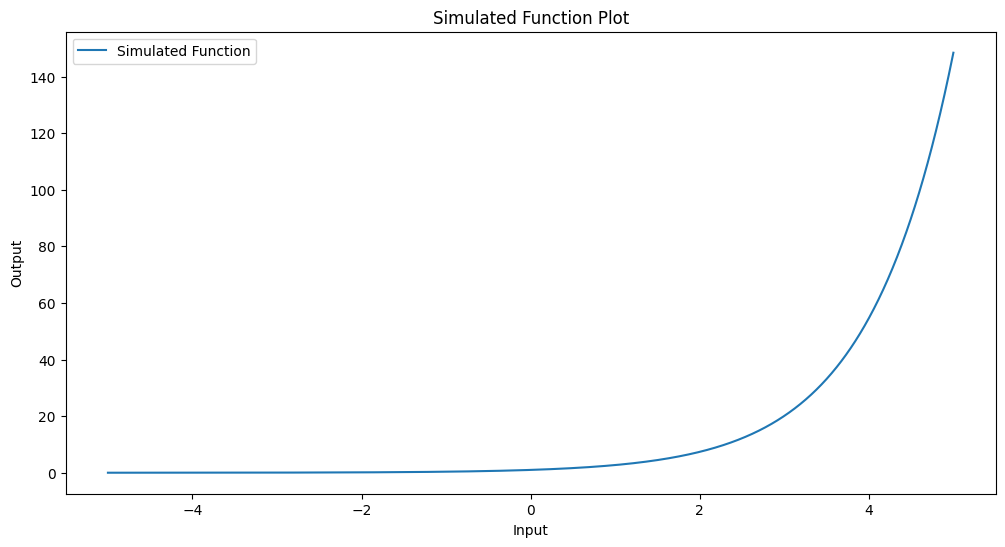

In [2]:
# Function to simulate the exponential function
def simulate_function(x):
    return np.exp(x)

# Generate training and validation data as tensors
x_train = torch.tensor(np.linspace(-5, 5, 10000).reshape(10000, 1), dtype=torch.float32)
y_train = torch.tensor(simulate_function(x_train), dtype=torch.float32)
x_val = torch.tensor(np.linspace(-5, 5, 2000).reshape(2000, 1), dtype=torch.float32)
y_val = torch.tensor(simulate_function(x_val), dtype=torch.float32)

# Plot the validation data
plt.figure(figsize=(12, 6))
plt.plot(x_val, y_val, label='Simulated Function')
plt.title('Simulated Function Plot')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.show()


In [3]:
class Model(nn.Module):
    def __init__(self,):
        super(Model, self).__init__()
    
        self.input_layer = nn.Linear(1, 12)
        
        self.hidden_layers = nn.ModuleList([
            nn.Linear(12, 10),
            nn.Linear(10, 18),
            nn.Linear(18, 8),
            nn.Linear(8, 6),
            nn.Linear(6, 5)
        ])
        
        
        self.output_layer = nn.Linear(5, 1)
        

    def forward(self, x):
        x = self.input_layer(x)
        x = F.leaky_relu(x, negative_slope=0.2)
        
        for hidden_layer in self.hidden_layers:
            x = hidden_layer(x)
            x = F.leaky_relu(x, negative_slope=0.2)
        
        output = self.output_layer(x)
        return output

model = Model()

optimizer = torch.optim.Adam(model.parameters(), lr = 1e-3)
loss_function = torch.nn.MSELoss()
model_total_params = sum(p.numel() for p in model.parameters())
print(f'Number of Model Parameters: {model_total_params}')

Number of Model Parameters: 599


In [4]:
def compute_grad_norm(model):
    grad_all = 0.0
    for p in model.parameters():
        grad = 0.0
        if p.grad is not None:
            grad = (p.grad.cpu().data.numpy() ** 2).sum()
        grad_all += grad
    return grad_all ** 0.5


In [5]:
def check_convergence(epoch, prev_loss, current_loss, tolerance):
    if epoch > 0 and abs(prev_loss - current_loss) < tolerance:
        print(f"Convergence reached at epoch {epoch} with Loss = {current_loss}")
        return True
    return False

def log_epoch_status(epoch, loss):
    if epoch % 150 == 0:
        print(f'Epoch: {epoch}, Loss = {loss:.4f}')

In [6]:

def train_epoch(model, optimizer, x_train, y_train):
    optimizer.zero_grad()
    outputs = model(x_train)
    loss = loss_function(outputs, y_train)
    loss.backward()
    optimizer.step()
    return loss

In [7]:
def train_model(model, optimizer, x_train, y_train, epochs=15000, tolerance=1e-5):
    model.train()
    losses, grad_arr, epoch_arr = initialize_training(epochs)
    prev_loss = float('inf')

    for epoch in range(epochs):
        epoch_arr.append(epoch)
        loss = perform_training_step(model, optimizer, x_train, y_train, losses)
        grad_norm = compute_grad_norm(model)
        grad_arr.append(grad_norm)

        log_epoch_status(epoch, loss.item())

        if check_convergence(epoch, prev_loss, loss.item(), tolerance):
            break

        prev_loss = loss.item()

    return losses, grad_arr, epoch_arr

In [8]:
def initialize_training(epochs):
    losses = []
    grad_arr = []
    epoch_arr = []
    return losses, grad_arr, epoch_arr

In [9]:
def perform_training_step(model, optimizer, x_train, y_train, losses):
    loss = train_epoch(model, optimizer, x_train, y_train)
    losses.append(loss.detach().numpy())
    return loss
model_losses, model_grad_norms, model_epoch_arr = train_model(model, optimizer, x_train, y_train)


Epoch: 0, Loss = 1102.9670
Epoch: 150, Loss = 283.6576
Epoch: 300, Loss = 227.2998
Epoch: 450, Loss = 180.0238
Epoch: 600, Loss = 108.3887
Epoch: 750, Loss = 33.4382
Epoch: 900, Loss = 22.5326
Epoch: 1050, Loss = 11.7598
Epoch: 1200, Loss = 6.7011
Epoch: 1350, Loss = 4.7652
Epoch: 1500, Loss = 3.5975
Epoch: 1650, Loss = 2.6603
Epoch: 1800, Loss = 1.7650
Epoch: 1950, Loss = 0.8826
Epoch: 2100, Loss = 0.3899
Epoch: 2250, Loss = 0.2277
Epoch: 2400, Loss = 0.1363
Epoch: 2550, Loss = 0.0851
Epoch: 2700, Loss = 0.0565
Epoch: 2850, Loss = 0.0419
Epoch: 3000, Loss = 0.0336
Epoch: 3150, Loss = 0.0278
Epoch: 3300, Loss = 0.0235
Epoch: 3450, Loss = 0.0205
Epoch: 3600, Loss = 0.0184
Convergence reached at epoch 3691 with Loss = 0.017370302230119705


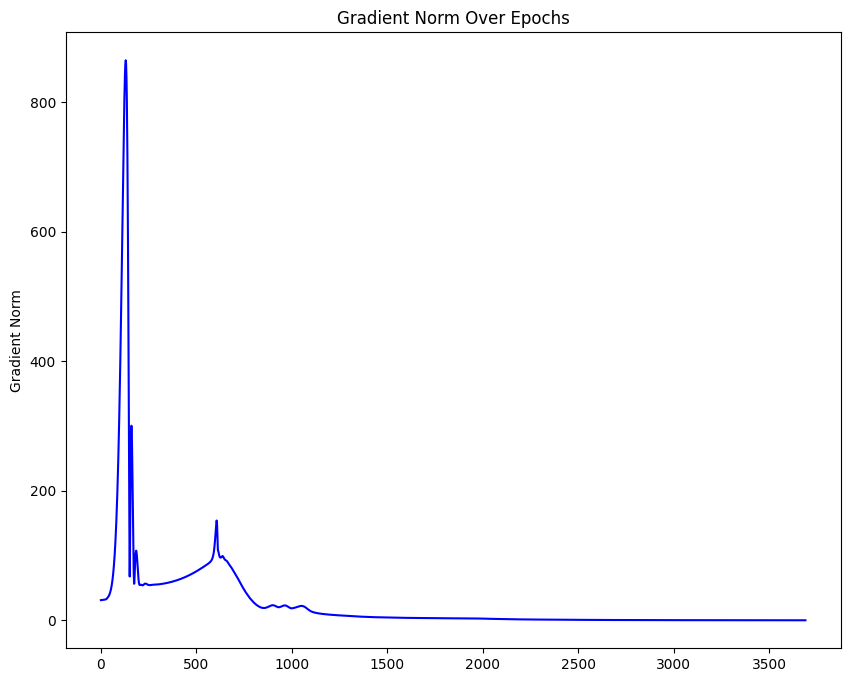

In [10]:
epochs = range(len(model_grad_norms))

# Gradient Norm Plot
plt.figure(figsize=(10, 8))
plt.plot(epochs, model_grad_norms, color='blue')
plt.title('Gradient Norm Over Epochs')
plt.ylabel('Gradient Norm')
plt.show()


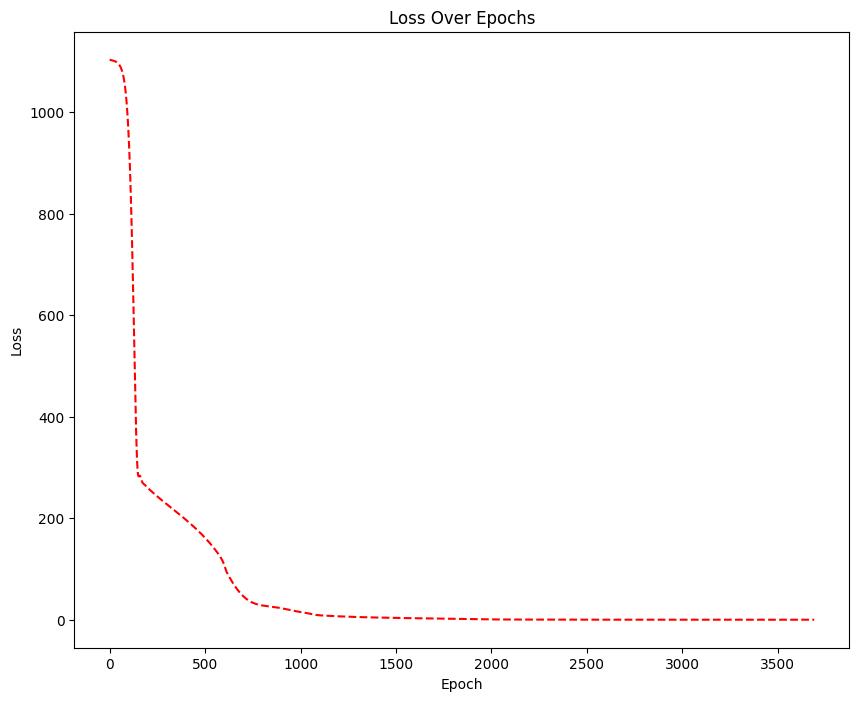

In [11]:
# Loss Plot
plt.figure(figsize=(10, 8))
plt.plot(epochs, model_losses, color='red', linestyle='--')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()